In [1]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("Model_predictions.csv")
df

,Input,Year,Subreddit,Kind,Not Kind
0,Good. It really helped mine and in a handful o...,2014,socialanxiety,1,0
1,I just got back from my first session. It was ...,2014,socialanxiety,0,1
2,I just told my mum a few days ago that I think...,2014,socialanxiety,1,0
3,"My mom said ""get over it""",2014,socialanxiety,0,1
4,A few years ago when i was 13 or so I was depr...,2014,socialanxiety,1,0
...,...,...,...,...,...
5802,I have same problem. Don't know what to do.,2021,Anger,0,1
5803,"Our anger drains our emotional strength, feeds...",2021,Anger,0,1
5804,&gt; Do I have autism or something? Here's a g...,2021,mentalhealth,0,1
5805,Fish tanks gave good advice. I agree with the ...,2021,Anger,1,0


In [9]:
newdf= df.groupby(["Year"]).sum()
newdf

,Kind,Not Kind
Year,,
2014,196,414
2015,229,447
2016,249,540
2017,222,627
2018,177,504
2019,179,542
2020,223,594
2021,176,488


In [10]:
newdf["Kindness_Normalized"] = newdf["Kind"]/(newdf["Kind"]+newdf["Not Kind"])

In [11]:
newdf

,Kind,Not Kind,Kindness_Normalized
Year,,,
2014,196,414,0.321311
2015,229,447,0.338757
2016,249,540,0.315589
2017,222,627,0.261484
2018,177,504,0.259912
2019,179,542,0.248266
2020,223,594,0.272950
2021,176,488,0.265060


In [12]:
newdf["NotKind_normalized"] = newdf["Not Kind"]/(newdf["Kind"]+newdf["Not Kind"])
newdf

,Kind,Not Kind,Kindness_Normalized,NotKind_normalized
Year,,,,
2014,196,414,0.321311,0.678689
2015,229,447,0.338757,0.661243
2016,249,540,0.315589,0.684411
2017,222,627,0.261484,0.738516
2018,177,504,0.259912,0.740088
2019,179,542,0.248266,0.751734
2020,223,594,0.272950,0.727050
2021,176,488,0.265060,0.734940


<AxesSubplot:xlabel='Year', ylabel='Kindness_Normalized'>

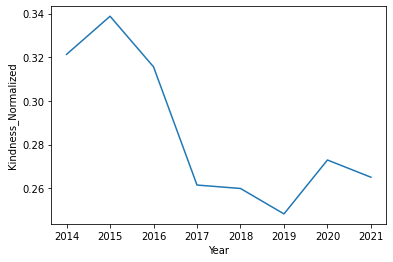

In [13]:
sns.lineplot(data=newdf, x="Year", y ="Kindness_Normalized")

In [14]:
otherdf= df.groupby(["Year","Subreddit"]).sum()
otherdf

Kind  Not Kind
Year Subreddit                    
2014 Anger            14        21
     depression       32       108
     mentalhealth     61        63
     socialanxiety    89       222
2015 Anger            24        51
     depression       43       111
     mentalhealth     28        72
     socialanxiety   134       213
2016 Anger            57        66
     depression       35       196
     mentalhealth     62        89
     socialanxiety    95       189
2017 Anger            63       108
     depression       36       188
     mentalhealth     48        93
     socialanxiety    75       238
2018 Anger            46        79
     depression       27       124
     mentalhealth     35        92
     socialanxiety    69       209
2019 Anger            82       147
     depression       22       120
     mentalhealth     40        85
     socialanxiety    35       190
2020 Anger           119       158
     depression       26       118
     mentalhealth     46       104
     socialanxiety    32       214
2021 Anger            67       120
     depression       27        97
     mentalhealth     40        84
     socialanxiety    42       187

In [15]:
otherdf["Kind normalized"] = otherdf["Kind"]/(otherdf["Kind"]+otherdf["Not Kind"])
otherdf["Not Kind normalized"] = otherdf["Not Kind"]/(otherdf["Kind"]+otherdf["Not Kind"])
otherdf

Kind  Not Kind  Kind normalized  Not Kind normalized
Year Subreddit                                                          
2014 Anger            14        21         0.400000             0.600000
     depression       32       108         0.228571             0.771429
     mentalhealth     61        63         0.491935             0.508065
     socialanxiety    89       222         0.286174             0.713826
2015 Anger            24        51         0.320000             0.680000
     depression       43       111         0.279221             0.720779
     mentalhealth     28        72         0.280000             0.720000
     socialanxiety   134       213         0.386167             0.613833
2016 Anger            57        66         0.463415             0.536585
     depression       35       196         0.151515             0.848485
     mentalhealth     62        89         0.410596             0.589404
     socialanxiety    95       189         0.334507             0.665493
2017 Anger            63       108         0.368421             0.631579
     depression       36       188         0.160714             0.839286
     mentalhealth     48        93         0.340426             0.659574
     socialanxiety    75       238         0.239617             0.760383
2018 Anger            46        79         0.368000             0.632000
     depression       27       124         0.178808             0.821192
     mentalhealth     35        92         0.275591             0.724409
     socialanxiety    69       209         0.248201             0.751799
2019 Anger            82       147         0.358079             0.641921
     depression       22       120         0.154930             0.845070
     mentalhealth     40        85         0.320000             0.680000
     socialanxiety    35       190         0.155556             0.844444
2020 Anger           119       158         0.429603             0.570397
     depression       26       118         0.180556             0.819444
     mentalhealth     46       104         0.306667             0.693333
     socialanxiety    32       214         0.130081             0.869919
2021 Anger            67       120         0.358289             0.641711
     depression       27        97         0.217742             0.782258
     mentalhealth     40        84         0.322581             0.677419
     socialanxiety    42       187         0.183406             0.816594

<AxesSubplot:xlabel='Year', ylabel='Kind normalized'>

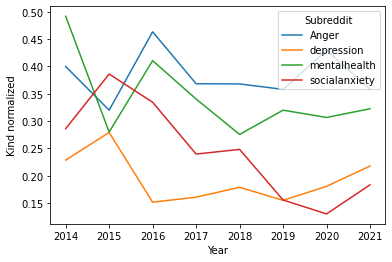

In [17]:
sns.lineplot(data=otherdf, x="Year", y="Kind normalized", hue="Subreddit")